LATENT DATA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import umap.umap_ as umap  
import seaborn as sns

latent_data = pd.read_csv("/home/azureuser/PROJECTS_ALL/MoGCN_Project/MoGCN_/result/latent_data.csv", index_col=0)


In [8]:
latent_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Sample,,,,,,,,,,,,,,,,,,,,,
C3L-00104,0.688225,0.707485,0.834936,0.630526,0.810150,0.688100,0.688938,0.853330,0.823291,0.831555,...,0.831575,0.666058,0.683322,0.677518,0.701875,0.717276,0.661747,0.693646,0.681638,0.691874
C3L-00365,0.661177,0.656361,0.856739,0.613593,0.851503,0.651154,0.645163,0.862725,0.849142,0.836979,...,0.637214,0.628771,0.642565,0.634273,0.652926,0.659448,0.639994,0.644410,0.632892,0.645117
C3L-00674,0.583409,0.633141,0.734833,0.614684,0.861365,0.642990,0.645215,0.876241,0.879586,0.843562,...,0.822772,0.635179,0.637042,0.328606,0.638612,0.616838,0.673340,0.637353,0.629968,0.643295
C3L-00677,0.654621,0.488669,0.870889,0.614241,0.851317,0.650475,0.648582,0.869354,0.873248,0.850240,...,0.821915,0.632932,0.386367,0.447350,0.655417,0.668413,0.501490,0.657927,0.632463,0.653350
C3L-01040,0.688400,0.706436,0.819140,0.626306,0.811047,0.693434,0.692509,0.846780,0.826979,0.826468,...,0.822789,0.667700,0.687565,0.686672,0.702373,0.717888,0.661860,0.689568,0.681980,0.689975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03183,0.495256,0.510729,0.614098,0.803849,0.926662,0.895473,0.885936,0.538163,0.541601,0.925404,...,0.561895,0.864736,0.489623,0.885275,0.900066,0.516256,0.293903,0.492656,0.878804,0.896761
C3N-03184,0.732109,0.769620,0.815130,0.656062,0.800315,0.747616,0.737828,0.841026,0.817756,0.818559,...,0.828694,0.706805,0.736886,0.737868,0.759179,0.767280,0.650224,0.728547,0.727282,0.741908
C3N-03186,0.660978,0.683323,0.832118,0.621388,0.828403,0.661347,0.666182,0.850304,0.842082,0.828157,...,0.811870,0.645756,0.663156,0.654530,0.664114,0.684728,0.586993,0.665631,0.654498,0.661883


In [14]:
# Perform KMeans clustering to create labels
kmeans = KMeans(n_clusters=6, random_state=42)  
labels = kmeans.fit_predict(latent_data)
features = latent_data

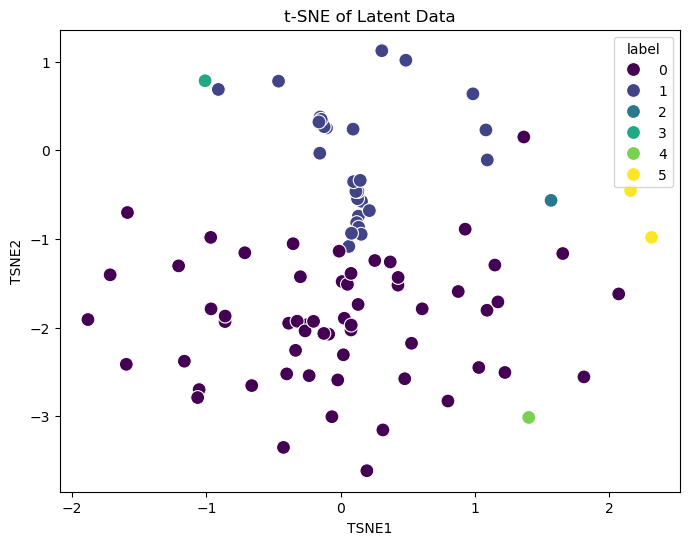

In [21]:

tsne = TSNE(n_components=2, perplexity=50, random_state=42)  # Adjust perplexity
tsne_results = tsne.fit_transform(features)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='viridis',
    s=100  
)
plt.title('t-SNE of Latent Data')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


/home/azureuser/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


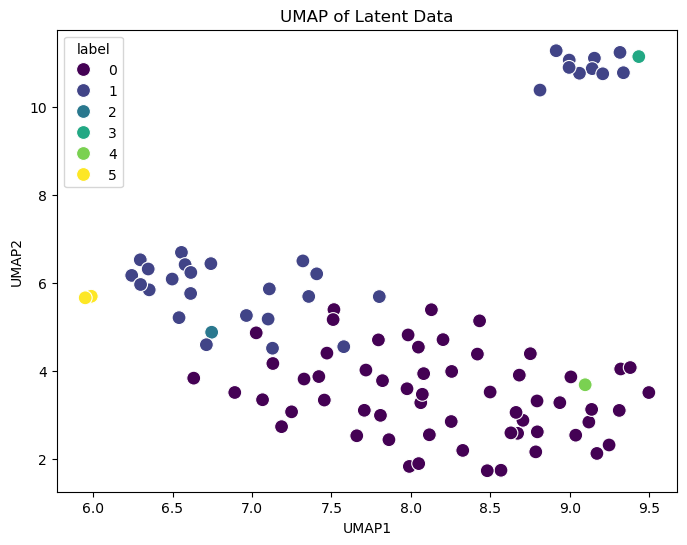

In [22]:

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
umap_results = reducer.fit_transform(features)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = labels

# Plot UMAP with larger points
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=umap_df,
    x='UMAP1',
    y='UMAP2',
    hue='label',
    palette='viridis',
    s=100  
)
plt.title('UMAP of Latent Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [ ]:
import scanpy as sc
import anndata as ad

In [30]:


# Load latent data
latent_data = pd.read_csv("/home/azureuser/PROJECTS_ALL/MoGCN_Project/MoGCN_/result/latent_data.csv", index_col=0)

# Convert to AnnData object
adata = ad.AnnData(X=latent_data.values)
adata.obs_names = latent_data.index
adata.var_names = latent_data.columns.astype(str)

# Compute neighborhoods and Leiden clustering
sc.pp.neighbors(adata, use_rep='X')
sc.tl.leiden(adata, resolution=1.0)
labels = adata.obs['leiden'].astype(int)

# t-SNE embedding
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(latent_data.values)
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'], index=latent_data.index)
tsne_df['Leiden Cluster'] = labels.values

# UMAP embedding
reducer = umap.UMAP(random_state=42)
umap_results = reducer.fit_transform(latent_data.values)
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'], index=latent_data.index)
umap_df['Leiden Cluster'] = labels.values



/home/azureuser/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


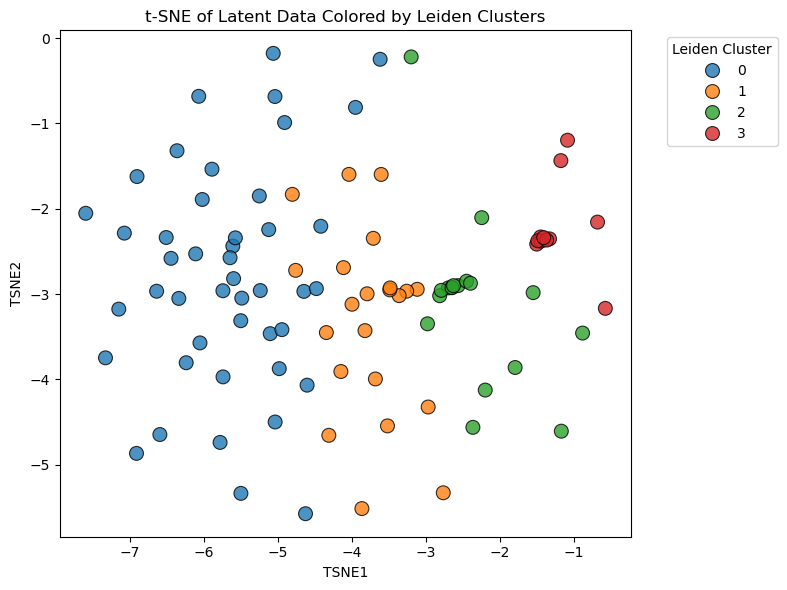

In [31]:

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Leiden Cluster',
    palette='tab10',
    s=100,
    alpha=0.8,
    edgecolor='k'
)
plt.title('t-SNE of Latent Data Colored by Leiden Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Leiden Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


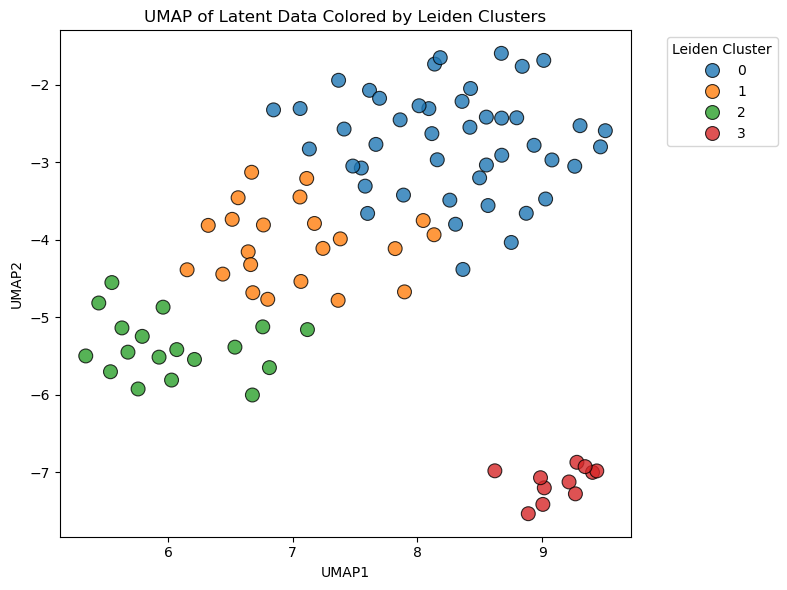

In [32]:
# Plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=umap_df,
    x='UMAP1',
    y='UMAP2',
    hue='Leiden Cluster',
    palette='tab10',
    s=100,
    alpha=0.8,
    edgecolor='k'
)
plt.title('UMAP of Latent Data Colored by Leiden Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Leiden Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()